In [220]:
import pandas as pd
from matplotlib import pyplot as plt
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))
from rutas import archivo_imagenes_etiquetadas_csv
from rutas import archivo_logs_csv
from rutas import archivo_perfiles_json

df_etiq=pd.read_csv(archivo_imagenes_etiquetadas_csv)
df_logs=pd.read_csv(archivo_logs_csv)
df_json=pd.read_json(archivo_perfiles_json)

#Porcentajes según el tipo de imagen


- Se toma la columna 'mimetype' del dataFrame para obtener la extensión del tipo de imagen.
- Aplico el método split('x') para dividir la cadena y asi obtener la extensión.
- Realizo un conteo de cada extensión. Se generá una serie  con las extensiones  y sus respectiva   cantidad de ocurrencias.
- Almaceno en la variable etiquetas los índices de la serie(extensiones).



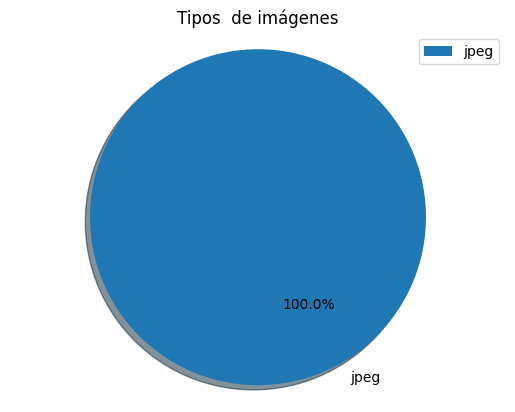

,ruta_imagen,descripcion,tags,resolucion,mimetype,tamaño,ultima_actualizacion,ultimo_perfil
0,imagenes/repositorio_imagenes/vegetables-g2f51...,Sin desripción,"Frutas, Caja",1920x1313,image/jpeg,0.42,2023-06-09 16:37:04.907152,Martin
1,imagenes/repositorio_imagenes/blueberries-g908...,Sin desripción,"Azul, Fruta",1920x1280,image/jpeg,0.55,2023-06-09 16:37:35.360674,Martin
2,imagenes/repositorio_imagenes/img7.jpg,Sin desripción,Espacio,800x667,image/jpeg,0.09,2023-06-09 16:37:45.323645,Martin
3,imagenes/repositorio_imagenes/cherries-g17c80d...,Sin desripción,"Fruta, Rojo",1920x1252,image/jpeg,0.50,2023-06-09 16:38:21.443583,Mariana
4,imagenes/repositorio_imagenes/onions-g7702794c...,Sin desripción,NaN,1920x1280,image/jpeg,0.35,2023-06-09 16:38:32.129767,Mariana
5,imagenes/repositorio_imagenes/img3.jpg,Sin desripción,Galaxia,800x1422,image/jpeg,0.12,2023-06-11 15:02:53.055012,Damacio


In [221]:

extensiones = df_etiq['mimetype'].str.split('/').str[1].value_counts()
etiquetas = extensiones.index

# Generar el gráfico de torta
plt.pie(extensiones, labels=etiquetas, autopct='%1.1f%%',
        shadow=True, startangle=120, labeldistance=1.1)

plt.axis('equal')
plt.legend(etiquetas)
plt.title("Tipos  de imágenes")

plt.show()
df_etiq

#Alto y ancho máximos

- Se toma la columna 'resolucion' del DataFrame para obtener el alto y ancho de las imagenes.
- Aplico el método split('x') para dividir la cadena y asi obtener el alto y el ancho de cada imagen.
- Se hace la conversión a entero tanto del alto como del ancho y aplico la funcion max para obtener el máximo.

In [222]:
maximo_alto = df_etiq['resolucion'].str.split('x').str[1].astype(int).max()
maximo_ancho = df_etiq['resolucion'].str.split('x').str[0].astype(int).max()

print(f"Máximo alto: {maximo_alto}px")
print(f"Máximo ancho: {maximo_ancho}px")

Máximo alto: 1422px
Máximo ancho: 1920px


#Inciso 7 de archivo de imagenes etiquetadas
    Tags más utilizados

- Se hace una copia del DataFrame obtenido del archivo de imagenes etiquetadas, ya que va a ser modificado.
- Se aplica el método str.split(',') a la columna 'tags' del DataFrame para dividir la cadena de tags de cada imagen.
- Luego nos quedamos con sola la columna 'tags' del DataFrame, se le aplica el metodo explode() para separar cada uno de los tags en una fila diferente y lo devuelve en una serie, se aplica el método strip(' ') para eliminar espacios que esten demas.
- Se aplica el método value_counts() para contabalizar cada uno de los tags, retorna una serie con cada tag y la cantidad de veces que apareció.
- Se aplica la función reset_index(name="Usos") para convertir la serie en un DataFrame y que se visualice de mejor manera.
- Por ultimo se cambió el nombre de la columna 'tags' por 'Tags' con la funcion rename.

In [223]:
df_7=df_etiq.copy()

df_7['tags']=df_7['tags'].str.split(',')
df_7=df_7['tags'].explode().str.strip(' ').value_counts().reset_index(name="Usos")
df_7=df_7.rename(columns={'tags': 'Tags'})

print("Tags más utilizados")
df_7

Tags más utilizados


,Tags,Usos
0,Fruta,2
1,Frutas,1
2,Caja,1
3,Azul,1
4,Espacio,1
5,Rojo,1
6,Galaxia,1


#Inciso 8 de archivo de imagenes etiquetadas
    Imagenes promedio


In [224]:
#inciso 8, archivo imagenes clasificadas
#Imagenes promedio

#Falta que calcule el promedio

df_8=df_etiq.rename(columns={'ultimo_perfil': 'Usuario'})

outer_join=pd.merge(df_8,df_json,on="Usuario",how="outer")
tabla_final=outer_join.groupby(outer_join["Usuario"])["tamaño"].sum().reset_index(name="Tamaño (MB)")

print('Imagenes promedio')
tabla_final

Imagenes promedio


,Usuario,Tamaño (MB)
0,Damacio,0.12
1,Mariana,0.85
2,Martin,1.06
3,Rogelio,0.00


#Inciso 1, archivo logs
    Operaciones por dias de la semana

- Se crea un DataFrame con cada uno de los dias de la semana representados como enteros, siendo 0 el lunes. Esto se hace para que en el caso de en un dia de la semana no haya habido usos de la aplicacion, aun asi se contabilice.
- Se crea una copia del DataFrame del archivo de logs ya que se va a modificar.
- A esta copia se le agrega la columna 'Dia', en la cual se va a almacenar el resultado de aplicarle la funcion datetime.fromtimestamp() a cada uno de los contenidos de la columna
'Fecha y Hora' que tiene almacenada el mymetype de cuando se ejecutó la acción. Esto va a retornar la fecha.
- Luego con el metodo groupby() y pasandole como parametro df_logs1['Dia'].dt.day_of_week, agrupo cada dia de la semana correspondiente a cada fecha y aplicando size() obtengo una serie que muestra el tamaño de cada dia.
- Como luego se hará un merge(), la serie necesita ser nombrada, se hace con df_logs1.name=
- Luego se hace el merge del dataframe creado al principio y de la serie resultante, con la modalidad "outer" y sobre "Dia" para que incluya aquellos dias en los que no se haya usado la aplicacion.
- A la columna 'Cantidad' se le aplica la funcion fillna(0) para que llene aquellos lugares Na, con 0, y astype(int) para convertir los numeros a integer, retorna una serie.
- Se cambian los indices de la serie por los nombres de los dias de la semana.
- Se establecen los colores que se mostraran para cada grafico de barra.
- Luego se arma el grafico con la serie y se establece el titulo y los nombres de los ejes.

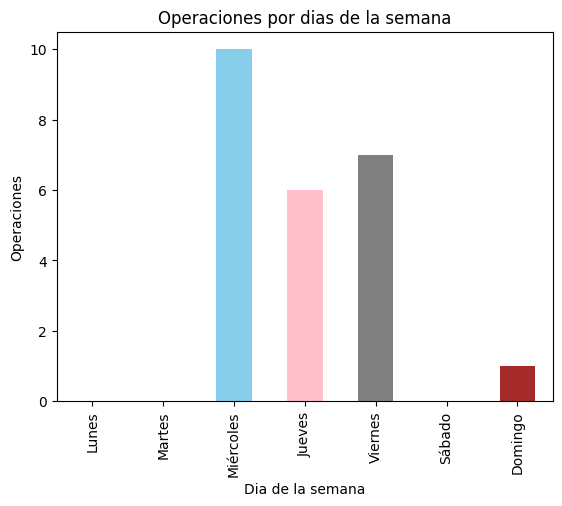

In [225]:


from datetime import datetime
df_dias =pd.DataFrame({'Dia': [0, 1, 2, 3, 4, 5, 6]})

df_logs1=df_logs.copy()
df_logs1['Dia']=df_logs1['Fecha y Hora'].apply(lambda x: datetime.fromtimestamp(x))
df_logs1=df_logs1.groupby(df_logs1['Dia'].dt.day_of_week).size()
df_logs1.name='Cantidad'

outer_join=pd.merge(df_dias,df_logs1,on='Dia',how="outer")
outer_join=outer_join['Cantidad'].fillna(0).astype(int)

outer_join.index=['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']

colores = ['red', 'green', 'skyblue', 'pink', 'gray', 'yellow', 'brown']
outer_join.plot.bar(color=colores)
plt.title('Operaciones por dias de la semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Operaciones')
plt.show()


#Inciso 1, archivo logs
    Operaciones por dias de la semana

- Se crea un DataFrame con cada uno de los dias de la semana representados como enteros, siendo 0 el lunes. Esto se hace para que en el caso de en un dia de la semana no haya habido usos de la aplicacion, aun asi se contabilice.
- Se crea una copia del DataFrame del archivo de logs ya que se va a modificar.
- A esta copia se le agrega la columna 'Dia', en la cual se va a almacenar el resultado de aplicarle la funcion datetime.fromtimestamp() a cada uno de los contenidos de la columna
'Fecha y Hora' que tiene almacenada el mymetype de cuando se ejecutó la acción. Esto va a retornar la fecha.
- Luego con el metodo groupby() y pasandole como parametro df_logs1['Dia'].dt.day_of_week, agrupo cada dia de la semana correspondiente a cada fecha y aplicando size() obtengo una serie que muestra el tamaño de cada dia.
- Como luego se hará un merge(), la serie necesita ser nombrada, se hace con df_logs1.name=
- Luego se hace el merge del dataframe creado al principio y de la serie resultante, con la modalidad "outer" y sobre "Dia" para que incluya aquellos dias en los que no se haya usado la aplicacion.
- A la columna 'Cantidad' se le aplica la funcion fillna(0) para que llene aquellos lugares Na, con 0, y astype(int) para convertir los numeros a integer, retorna una serie.
- Se cambian los indices de la serie por los nombres de los dias de la semana.
- Se establecen los colores que se mostraran para cada grafico de barra.
- Luego se arma el grafico con la serie y se establece el titulo y los nombres de los ejes.

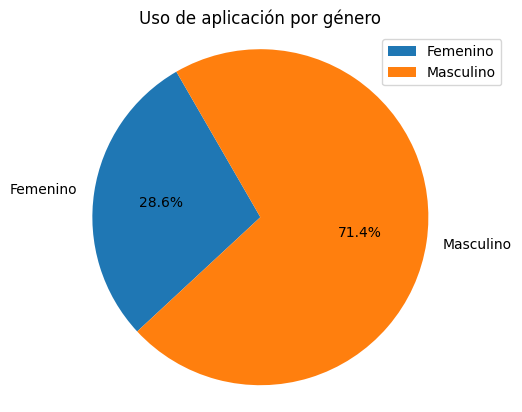

In [204]:
#inciso 2, archivos logs
#Uso por genero

df_logs2=df_logs.copy().rename(columns={'Nick': 'Usuario'})
inner_join=pd.merge(df_logs2,df_json,on="Usuario",how="inner")
tabla_final=inner_join.groupby(inner_join["Genero"])["Genero"].count().reset_index(name="Cantidad")

plt.pie(tabla_final["Cantidad"], labels=tabla_final["Genero"], autopct='%1.1f%%',
        shadow=False, startangle=120, labeldistance=1.1)
plt.axis('equal')
plt.legend(tabla_final["Genero"])
plt.title("Uso de aplicación por género")

plt.show()